### Chapter 3.2
# Renewal Process and Recurrence Time
---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---

A renewal process is a point process, in which the interarrival intervals $A_i$ between successive points in time are independently and identically distributed (*iid*).

The probability density function $r(t)$ of the recurrence time $R$ of a renewal process can be derived from the cumulative distribution function $A(t)$ of the interarrival time $A$ according to: 

$
r(t) = \frac{1}{E[A]} \cdot (1 - A(t))
    = \lambda \int\limits_{\tau = t}^\infty a(\tau) \;d\tau 
$       

### Example: Substitute Distributions
In the performance modeling practice we often face the challenge to describe a  random variable, where only two parameters -- e.g. mean and variance -- are roughly obtained from measurements. 
In literature, a so-called two-moment substitution distribution is often taken instead of a general distribution \cite{GoTr93}. This substitute distribution $A$ has the same mean and variance as the original distribution $A^*$, but is analytically more tractable. To obtain a desired expectation $E[A]$ and coefficient of variation $c_A$, the following substitute distributions are used:

#### Case: $\mathbf{c_A > 1}$   <br> 2nd order hyperexponential distribution with symmetry assumption, $A \sim \mathrm{H}_2$
	
$ A(t) = 1-p\cdot e^{-t/t_1} - (1-p)\cdot e^{-t/t_2} $
         
where $t_1 = E[A] \left( 1+ \sqrt{\frac{c_A^2-1}{c_A^2+1}} \right)^{-1}  \\ 
t_2 = E[A] \left( 1 - \sqrt{\frac{c_A^2-1}{c_A^2+1}} \right)^{-1}   \\
			p=\frac{E[A]}{2 t_1}$
            
#### Case: $\mathbf{0 < c_A \leq 1}$  <br> Shifted exponential distribution, $\displaystyle A \sim \mathrm{Exp}\big(\frac{1}{t_2}\big)+t_1$

$ A(t) = \begin{cases}
							0  & 0 \leq t < t_1 \\
							1 - e^{-(t-t_1)/t_2}  & t \geq t_1
					 \end{cases} 
$                     
			
where $t_1 = E[A](1-c_A)$ and $t_2=E[A]c_A$.

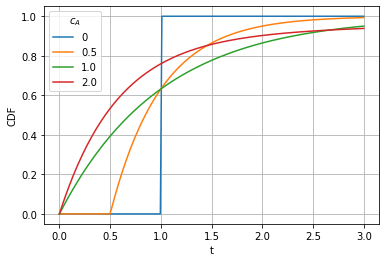

In [31]:
import numpy as np
from matplotlib import pyplot as plt

def cdfA(t, EA=1.0, cA=1.0):    
    if cA==1:
        return 1-np.exp(-t/EA)
    elif cA==0:
        if isinstance(t, np.ndarray):
            y = np.zeros_like(t)
            y[t>=EA] = 1.0
            return y
        else:
            return 1.0 if t>EA else 0.0        
    elif cA<1:
        t1 = EA*(1-cA)
        t2 = EA*cA
        if isinstance(t, np.ndarray):
            y = np.zeros_like(t)
            y[t>=t1] = 1-np.exp(-(t[t>=t1]-t1)/t2) 
            return y
        else:
            return 1-np.exp(-(t-t1)/t2) if t>=t1 else 0.0
    else: # cA>1
        t1 = EA/(1+np.sqrt((cA**2-1)/(cA**2+1)))
        t2 = EA/(1-np.sqrt((cA**2-1)/(cA**2+1)))
        p = EA/(2*t1)
        y = 1-p*np.exp(-t/t1)-(1-p)*np.exp(-t/t2)
        return y
        
t = np.linspace(0,3,200)
for cA in [0, 0.5, 1.0, 2.0]:
    plt.plot(t, cdfA(t, EA=1.0, cA=cA), label=cA)
plt.xlabel('t')
plt.ylabel('CDF')
plt.grid(which='major')
plt.legend(title='$c_A$');

## Recurrence Time
The probability density function of the recurrence time is
$
r(t) = \frac{1}{E[A]} \cdot (1 - A(t))
$

The cumulative distribution function can be computed using numerical integration [`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html): $R(t) = \int_{\tau=0}^t r(\tau) d\tau$

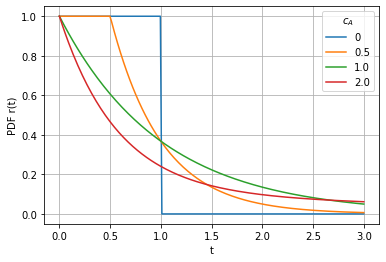

In [32]:
EA = 1.0
for cA in [0, 0.5, 1.0, 2.0]:
    plt.plot(t, (1-cdfA(t, EA=EA, cA=cA))/EA, label=cA)
plt.xlabel('t')
plt.ylabel('PDF r(t)')
plt.legend(title='$c_A$')
plt.grid(which='major');

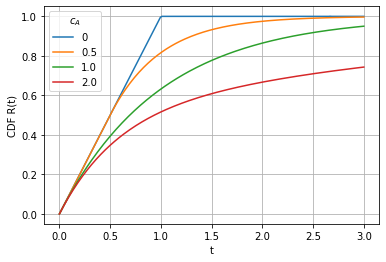

In [33]:
import scipy.integrate as integrate

EA = 1.0

for cA in [0, 0.5, 1.0, 2.0]:
    rt = lambda x: (1-cdfA(x, EA=EA, cA=cA))/EA
    Rt = lambda x: integrate.quad(rt, 0, x)[0]

    y = [Rt(x) for x in t]    
    plt.plot(t, y, label=cA)
    
plt.xlabel('t')
plt.ylabel('CDF R(t)')
plt.legend(title='$c_A$')
plt.grid(which='major');

## Mean Recurrence Time
The mean of the recurrence time is

$ 
E[R] = \frac{c_A^2 + 1}{2} \cdot E[A] 
$

which means 

$
c_A < 1  : \quad E[R] < E[A]\; , \\
 c_A = 1 : \quad E[R] = E[A]\; , \\
 c_A > 1 : \quad E[R] > E[A] \; .
$

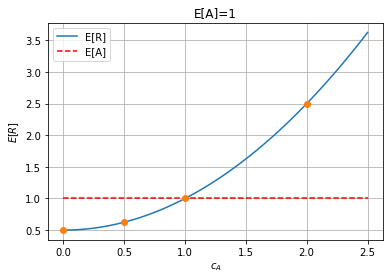

In [40]:
EA = 1
cA = np.linspace(0,2.5,100)
plt.plot(cA, (cA**2+1)/2*EA, label='E[R]')
plt.plot(cA, np.zeros_like(cA)+EA, 'r--', label='E[A]')

cA = np.array([0, 0.5, 1.0, 2.0])
plt.plot(cA, (cA**2+1)/2*EA, 'o')

plt.xlabel('$c_A$')
plt.ylabel('$E[R]$')
plt.title(f'E[A]={EA}')
plt.legend()
plt.grid(which='major');